# Data Analysis with Python
## Car Price Prediction
#### This project creates a model to predict the price of Cars.

### Data-Wrangling

In [2]:
# importing all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
# Loading Data
mydata = pd.read_csv('raw_automobile_data.csv')
mydata.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
mydata.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [5]:
df=mydata.drop(['Unnamed: 0'], axis = 1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Identify and handle missing values

#### Checking for missing values:

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We see that there are missing values as follows
- There are 41 missing values in normalized-losses
- There are 2 missing values in num-of-doors
- There are 4 missing values in bore
- There are 4 missing values in stroke
- There are 2 missing values in horsepower
- There are 2 missing values in peak-rpm
- There are 4 missing values in price

#### Deal with missing data
How to deal with missing data? What can we do?
 1. drop data
    - drop the whole row
    - drop the whole column
 2. replace data
    - replace it by mean
    - replace it by frequency
    - replace it based on other functions

### Idea:

#### Here we want to predict car price. So can do the following:

##### Replace by mean for the numeric columns
- "normalized-losses": 41 missing data, replace them with mean 
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean 
- "peak-rpm": 2 missing data, replace them with mean


In [7]:
# Countinig bedrooms categories
df['num-of-doors'].value_counts().to_frame()

,num-of-doors
four,114
two,89


##### Replace by highest frequency for categorical column (replace by mostly repeated item)
- "num-of-doors": 2 missing data, replace them with "four". Since four doors is most frequent, it is most likely to occur

##### Drop the whole row for the column to be predicted (do not use approximated values)
 - "price": 4 missing data, simply delete the whole row


#### Calculate the average of the column and Replace "NaN" by mean value in the column



#### "normalized-losses"


In [8]:
avg_norm_loss = df['normalized-losses'].astype("float").mean() 
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### "bore"

In [9]:
avg_bore = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, avg_bore, inplace = True)

#### "stroke"

In [10]:
avg_stroke =df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

#### "horsepower"

In [11]:
avg_horsepower = df['horsepower'].mean()
df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

#### "peak-rpm"

In [12]:
avg_peak_rpm = df['peak-rpm'].mean()
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace= True)

#### "num-of-doors"

In [13]:
df['num-of-doors'].replace(np.nan, "four", inplace = True)

#### Price: dropping all rows of price with nan values

In [14]:
#simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True) 

In [15]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Correcting data format

#### Lets list the data types for each column

In [16]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##### 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.


#### Changing data format

In [17]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float") 
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int") 
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [20]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Descriptive Statistical Analysis
The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [18]:
# Data Summary
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Normalization
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [19]:
# Normalizing columns
# replace (original value) by (original value)/(maximum value)
df['normalized-losses'] = df['normalized-losses']/df['normalized-losses'].max() 
df['length'] = df['length']/df['length'].max() 
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df['curb-weight'] = df['curb-weight']/df['curb-weight'].max()
df['engine-size'] = df['engine-size']/df['engine-size'].max()
df['horsepower'] = df['horsepower']/df['horsepower'].max()
df['peak-rpm'] = df['peak-rpm']/df['peak-rpm'].max()

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.476562,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.398773,mpfi,3.47,2.68,9.0,0.423664,0.757576,21,27,13495.0
1,3,0.476562,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.398773,mpfi,3.47,2.68,9.0,0.423664,0.757576,21,27,16500.0
2,1,0.476562,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0.466258,mpfi,2.68,3.47,9.0,0.587786,0.757576,19,26,16500.0
3,2,0.640625,audi,gas,std,four,sedan,fwd,front,99.8,...,0.334356,mpfi,3.19,3.40,10.0,0.389313,0.833333,24,30,13950.0
4,2,0.640625,audi,gas,std,four,sedan,4wd,front,99.4,...,0.417178,mpfi,3.19,3.40,8.0,0.438931,0.833333,18,22,17450.0


### Dealing with Categorical variables

In [21]:
df['fuel-type'].value_counts().to_frame()

,fuel-type
gas,181
diesel,20


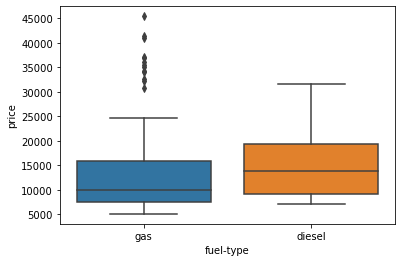

In [22]:
sns.boxplot(x="fuel-type", y="price", data=df)
plt.show()

In [23]:
df['num-of-doors'].value_counts().to_frame()

,num-of-doors
four,115
two,86


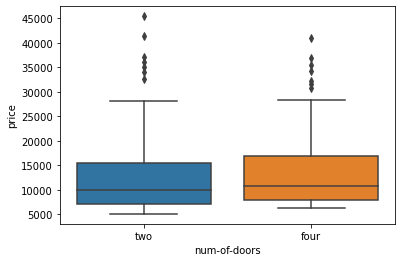

In [24]:
sns.boxplot(x="num-of-doors", y="price", data=df)
plt.show()

In [25]:
df['body-style'].value_counts().to_frame()

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


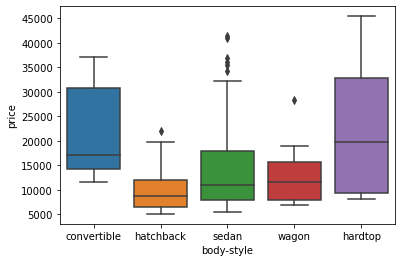

In [26]:
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

In [27]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


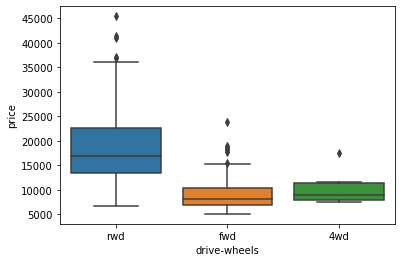

In [28]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

In [29]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


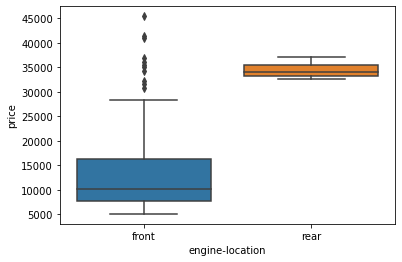

In [30]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

In [31]:
df['make'].value_counts().to_frame()

,make
toyota,32
nissan,18
mazda,17
honda,13
mitsubishi,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


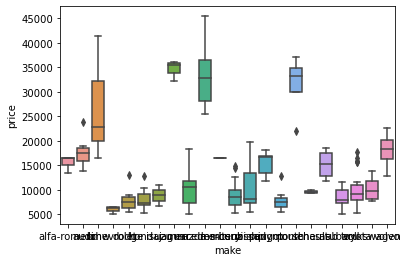

In [32]:
sns.boxplot(x="make", y="price", data=df)
plt.show()

### Indicator variable (or dummy variable)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

We can use categorical variables for regression analysis in the later modules. For example, We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression understand only numbers. To use this attribute in regression analysis, we convert "fuel-type" into numbers.

In [33]:
# Preprocessing
from sklearn import preprocessing
label_fule_type = preprocessing.LabelEncoder()
label_fule_type.fit(['gas','diesel'])
df.iloc[:,3] = label_fule_type.transform(df.iloc[:,3]) 

label_num_door = preprocessing.LabelEncoder()
label_num_door.fit(['four','two'])
df.iloc[:,5] = label_num_door.transform(df.iloc[:,5]) 

label_body_style = preprocessing.LabelEncoder()
label_body_style.fit(['sedan','hatchback','wagon', 'hardtop','convertible'])
df.iloc[:,6] = label_body_style.transform(df.iloc[:,6]) 

label_drive_wheels = preprocessing.LabelEncoder()
label_drive_wheels.fit(['fwd','rwd', '4wd'])
df.iloc[:,7] = label_drive_wheels.transform(df.iloc[:,7]) 

label_engine_location = preprocessing.LabelEncoder()
label_engine_location.fit(['front','rear'])
df.iloc[:,8] = label_engine_location.transform(df.iloc[:,8]) 

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.476562,alfa-romero,1,std,1,0,2,0,88.6,...,0.398773,mpfi,3.47,2.68,9.0,0.423664,0.757576,21,27,13495.0
1,3,0.476562,alfa-romero,1,std,1,0,2,0,88.6,...,0.398773,mpfi,3.47,2.68,9.0,0.423664,0.757576,21,27,16500.0
2,1,0.476562,alfa-romero,1,std,1,2,2,0,94.5,...,0.466258,mpfi,2.68,3.47,9.0,0.587786,0.757576,19,26,16500.0
3,2,0.640625,audi,1,std,0,3,1,0,99.8,...,0.334356,mpfi,3.19,3.40,10.0,0.389313,0.833333,24,30,13950.0
4,2,0.640625,audi,1,std,0,3,0,0,99.4,...,0.417178,mpfi,3.19,3.40,8.0,0.438931,0.833333,18,22,17450.0
5,2,0.476562,audi,1,std,1,3,1,0,99.8,...,0.417178,mpfi,3.19,3.40,8.5,0.419847,0.833333,19,25,15250.0
6,1,0.617188,audi,1,std,0,3,1,0,105.8,...,0.417178,mpfi,3.19,3.40,8.5,0.419847,0.833333,19,25,17710.0
7,1,0.476562,audi,1,std,0,4,1,0,105.8,...,0.417178,mpfi,3.19,3.40,8.5,0.419847,0.833333,19,25,18920.0
8,1,0.617188,audi,1,turbo,0,3,1,0,105.8,...,0.401840,mpfi,3.13,3.40,8.3,0.534351,0.833333,17,20,23875.0
9,2,0.750000,bmw,1,std,1,3,2,0,101.2,...,0.331288,mpfi,3.50,2.80,8.8,0.385496,0.878788,23,29,16430.0


### Part 2: Exploratory-Data-Analysis

#### How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

Also, we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":


In [34]:
df.corr()

,symboling,normalized-losses,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,4.662638e-01,0.196735,0.672344,-0.600333,-0.053056,2.123389e-01,-0.535987,-0.365404,-0.242423,...,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000e+00,0.101546,0.361368,-0.251775,0.317214,1.355890e-17,-0.056661,0.019424,0.086802,...,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
fuel-type,0.196735,1.015463e-01,1.000000,0.186681,-0.147654,-0.131096,4.091700e-02,-0.307237,-0.211187,-0.244356,...,-0.221046,-0.070779,-0.054458,-0.241064,-0.985231,0.169053,0.475812,-0.265676,-0.198690,-0.110326
num-of-doors,0.672344,3.613676e-01,0.186681,1.000000,-0.688542,0.115920,1.423403e-01,-0.445245,-0.395122,-0.227655,...,-0.208517,-0.024094,-0.119222,0.007672,-0.169164,0.102889,0.232054,0.027617,0.045787,-0.042435
body-style,-0.600333,-2.517751e-01,-0.147654,-0.688542,1.000000,-0.161004,-2.783504e-01,0.407128,0.347571,0.155366,...,0.145762,-0.063692,0.021233,-0.013401,0.134622,-0.136472,-0.105713,0.014217,-0.021328,-0.072933
drive-wheels,-0.053056,3.172142e-01,-0.131096,0.115920,-0.161004,1.000000,1.493687e-01,0.467661,0.495197,0.481395,...,0.590642,0.526027,0.471838,0.078738,0.120125,0.545892,-0.035765,-0.469240,-0.472893,0.588333
engine-location,0.212339,1.355890e-17,0.040917,0.142340,-0.278350,0.149369,1.000000e+00,-0.189115,-0.053086,-0.052205,...,0.051287,0.199367,0.188413,-0.139339,-0.020467,0.342117,0.201917,-0.157132,-0.102964,0.331062
wheel-base,-0.535987,-5.666124e-02,-0.307237,-0.445245,0.407128,0.467661,-1.891150e-01,1.000000,0.876024,0.814507,...,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,1.942356e-02,-0.211187,-0.395122,0.347571,0.495197,-5.308613e-02,0.876024,1.000000,0.857170,...,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,8.680206e-02,-0.244356,-0.227655,0.155366,0.481395,-5.220549e-02,0.814507,0.857170,1.000000,...,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265


In [35]:
df.corr()['price'].sort_values()

highway-mpg         -0.704692
city-mpg            -0.686571
fuel-type           -0.110326
peak-rpm            -0.101616
symboling           -0.082391
body-style          -0.072933
num-of-doors        -0.042435
compression-ratio    0.071107
stroke               0.082269
normalized-losses    0.133999
height               0.135486
engine-location      0.331062
bore                 0.543155
wheel-base           0.584642
drive-wheels         0.588333
length               0.690628
width                0.751265
horsepower           0.809575
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

From the above correlation matrix, we see that the highly related variables with price are: highway-mpg, city-mpg, bore, wheel-base, drive-wheels, length, width, horsepower, curb-weight, engine-size. So our study will mostly focus with these variables.

In [37]:
from scipy import stats

In [38]:
# wheel-base VS price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, 
      " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


#### Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)



In [40]:
# Engine-size vs Price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef, p_value

(0.8723351674455186, 9.265491622197335e-64)

#### Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).



In [42]:
#Highway-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
pearson_coef, p_value

(-0.704692265058953, 1.7495471144476358e-31)

#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.



### Regression Plot:
In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

Let's find the scatterplot of "engine-size" and "price"

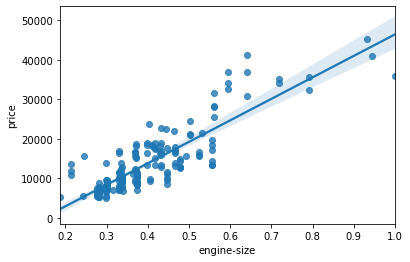

In [43]:
#Engine size as potential predictor variable of price
sns.regplot(x = "engine-size", y ="price", data=df)
plt.show()

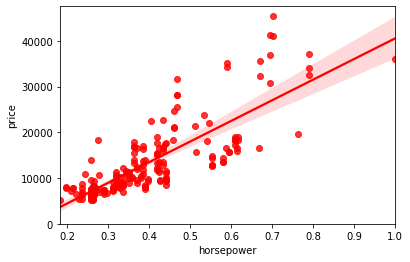

In [44]:
# Engine size as potential predictor variable of price
sns.regplot(x="horsepower", y="price", data=df, color ='r') 
plt.ylim(0,)
plt.show()

We can examine the correlation between 'engine-size', 'horsepower, and 'price' and see:

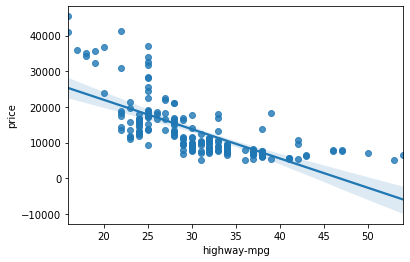

In [45]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.show()

### Model Development 

We are working with the data:

In [46]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.476562,alfa-romero,1,std,1,0,2,0,88.6,...,0.398773,mpfi,3.47,2.68,9.0,0.423664,0.757576,21,27,13495.0
1,3,0.476562,alfa-romero,1,std,1,0,2,0,88.6,...,0.398773,mpfi,3.47,2.68,9.0,0.423664,0.757576,21,27,16500.0
2,1,0.476562,alfa-romero,1,std,1,2,2,0,94.5,...,0.466258,mpfi,2.68,3.47,9.0,0.587786,0.757576,19,26,16500.0
3,2,0.640625,audi,1,std,0,3,1,0,99.8,...,0.334356,mpfi,3.19,3.40,10.0,0.389313,0.833333,24,30,13950.0
4,2,0.640625,audi,1,std,0,3,0,0,99.4,...,0.417178,mpfi,3.19,3.40,8.0,0.438931,0.833333,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,0.371094,volvo,1,std,0,3,2,0,109.1,...,0.432515,mpfi,3.78,3.15,9.5,0.435115,0.818182,23,28,16845.0
197,-1,0.371094,volvo,1,turbo,0,3,2,0,109.1,...,0.432515,mpfi,3.78,3.15,8.7,0.610687,0.803030,19,25,19045.0
198,-1,0.371094,volvo,1,std,0,3,2,0,109.1,...,0.530675,mpfi,3.58,2.87,8.8,0.511450,0.833333,18,23,21485.0
199,-1,0.371094,volvo,0,turbo,0,3,2,0,109.1,...,0.444785,idi,3.01,3.40,23.0,0.404580,0.727273,26,27,22470.0


#### Multiple linear Regression

Let us fit a linear regression model to predict the 'price' using the list of following features:

In [48]:
features = ['highway-mpg', 'city-mpg', 'bore', 'wheel-base', 'drive-wheels', 
            'length', 'width', 'horsepower', 'curb-weight', 'engine-size']

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df[features] # input data
y = df['price'] #output data
# Spliting the input and output data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=1)
print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 41
number of training samples: 160


In [50]:
# linear model
linear_model = LinearRegression() 
linear_model.fit(X_train,y_train)

LinearRegression()

In [51]:
# Model Evaluation
# Find the R^2
print('The R-square is: ', linear_model.score(X_test, y_test))

The R-square is:  0.7381081244027725


In [52]:
# Prediction using model
y_pred = linear_model.predict(X_test)
y_pred[0:5]

array([11321.36284339,  6516.09233557, 11499.86776025,  6642.8327704 ,
       16811.97262037])

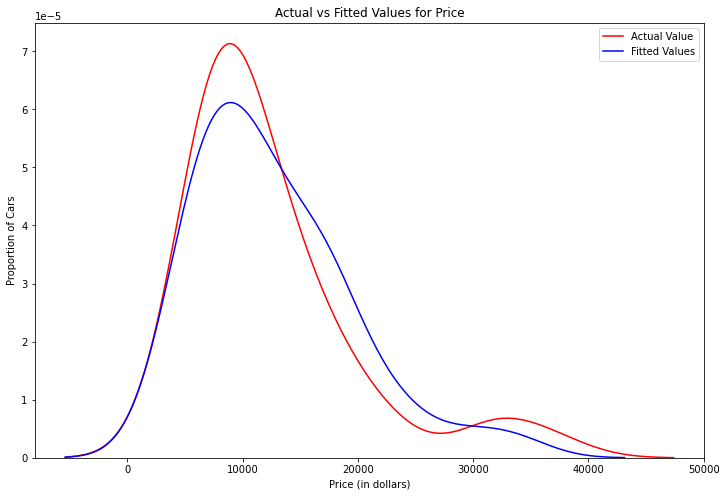

In [53]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(y_pred, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

#### Using Pipeline

In [55]:
#fiting pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [56]:
# model evalution
pipe.score(X_test, y_test)

0.8438346231704439

In [57]:
# Prediction
ypipe=pipe.predict(X_test) 
ypipe[0:4]

array([9141.30267821, 7354.26207681, 9726.79647114, 5737.25291305])

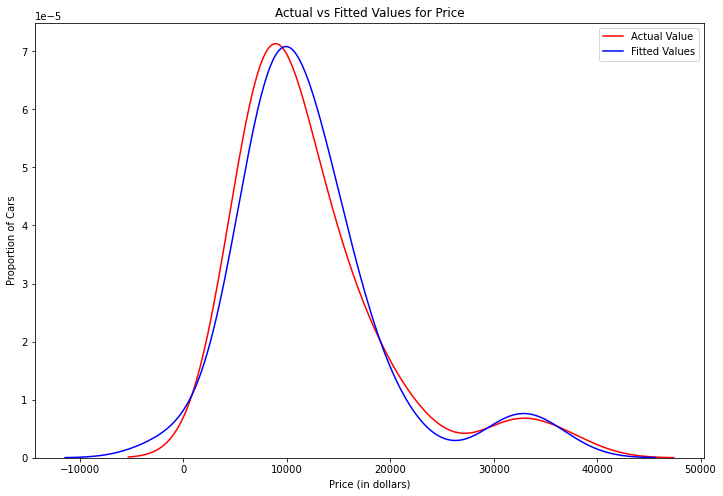

In [58]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypipe, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

#### RigeModel

In [59]:
from sklearn.linear_model import Ridge
# fitting ridge model
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(X_train, y_train) 

Ridge(alpha=0.1)

In [60]:
# model evalution
RigeModel.score(X_test, y_test)

0.7326065317964654

In [62]:
# Prediction
yridge=RigeModel.predict(X_test) 
yridge[0:4]

array([11343.94451995,  6336.13280359, 11204.1268479 ,  6652.13456119])

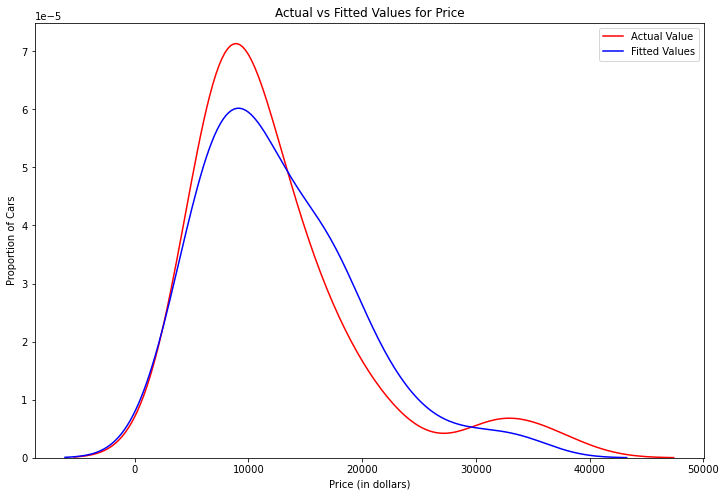

In [63]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(yridge, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

#### Polynomial Regression

In [64]:
# fitting a polynomial feature of degree 2
pol2=PolynomialFeatures(degree=2) 
X_train_pol2=pol2.fit_transform(X_train) 
X_test_pol2=pol2.fit_transform(X_test)
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(X_train_pol2, y_train) 

Ridge(alpha=0.1)

In [65]:
# model evalution
RigeModel.score(X_test_pol2, y_test)

0.8511653871644036

In [66]:
# Prediction
ypol2 = RigeModel.predict(X_test_pol2)
ypol2[0:4]

array([ 9876.09507288,  7040.32177535, 10567.72540936,  7785.39193095])

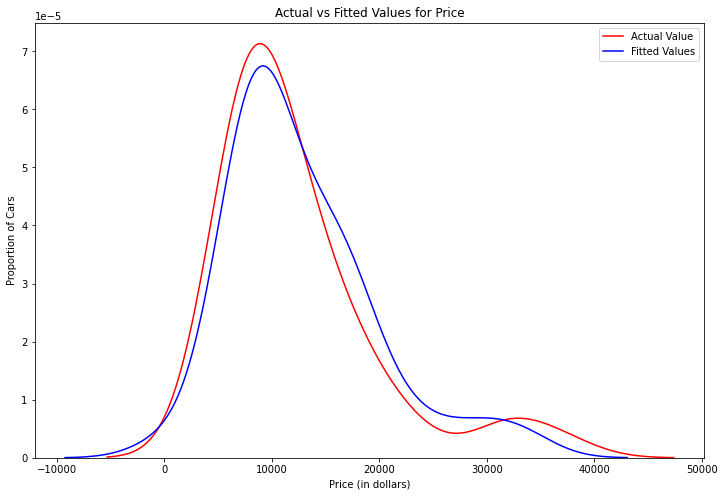

In [67]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypol2, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

In [68]:
# fitting a polynomial feature of degree 3
pol3=PolynomialFeatures(degree=3) 
X_train_pol3=pol3.fit_transform(X_train) 
X_test_pol3=pol3.fit_transform(X_test)
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(X_train_pol3, y_train) 

Ridge(alpha=0.1)

In [69]:
# model evalution
RigeModel.score(X_test_pol3, y_test)

0.6284017826275979

In [70]:
# Prediction
ypol3 = RigeModel.predict(X_test_pol3)
ypol3[0:4]

array([7609.89125376, 6470.77224393, 9422.61290058, 5734.2794784 ])

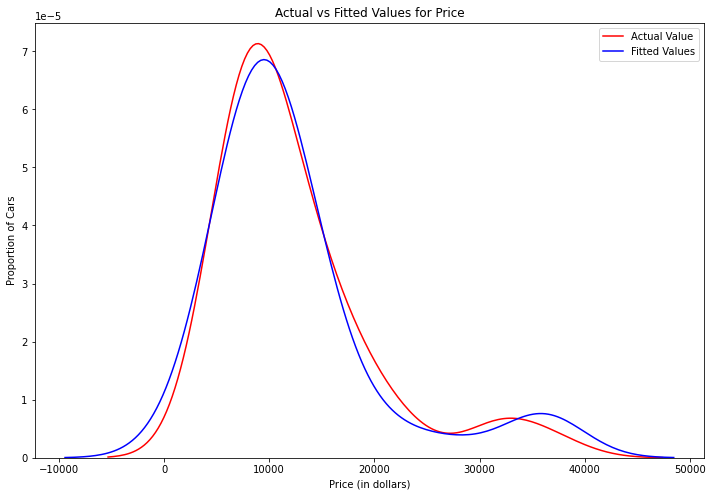

In [71]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypol3, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

#### Conclusion
Among all the models, the model polynomial regression with degree 2 looks better fit than the others. So we use polynomial regression model with degree two to predict the Car prices

In [72]:
# Car Price prediction using the model polynomial regression with degree 2
ypol2[0:10]

array([ 9876.09507288,  7040.32177535, 10567.72540936,  7785.39193095,
       15741.32320742,  7261.85280462, 14550.56605425,  9418.60031821,
       12747.08871069,  6228.76811236])